# Stock Prediction Using LSMT Micrsoft Corp. using pytorch

In [87]:
# importing the the required libreries
import numpy as np
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

In [88]:
# read the file
msft_df=pd.read_csv("MSFT2.csv")
closed_prices=msft_df["Close"]

In [89]:
msft_df.head(2)
msft_df.tail(3)

,Date,Open,High,Low,Close,Adj Close,Volume
8521,2023-11-02,347.239990,348.829987,344.769989,348.320007,348.320007,24348100
8522,2023-11-03,349.630005,354.390015,347.329987,352.799988,352.799988,23624000
8523,2023-11-06,353.450012,357.540009,353.350006,356.529999,356.529999,23828300


In [80]:
#difine sequence length
seq_len=15
mm=MinMaxScaler()
# increase the dimension to fit and transfrom
scaled_prices=mm.fit_transform(np.array(closed_prices )[... , None]).squeeze()
print(scaled_prices)

[9.43292395e-05 8.94921284e-05 4.11182309e-05 ... 9.68876469e-01
 9.81359284e-01 9.91752416e-01]


In [90]:
x=[] # for data
y=[] # for traget

# enlisting data and target
for i in range(len(scaled_prices)- seq_len):
    x.append(scaled_prices[i : i+seq_len])
    y.append(scaled_prices[i+seq_len])

In [82]:
print(x[0])
len(x[0])
# 15 value as per sequence lenth 

[9.43292395e-05 8.94921284e-05 4.11182309e-05 7.25566668e-06
 0.00000000e+00 0.00000000e+00 5.07924531e-05 2.66068975e-05
 1.71728590e-04 1.54798701e-04 8.94921284e-05 7.01436839e-05
 8.94921284e-05 8.94921284e-05 8.94921284e-05]


15

In [91]:
# Dive into train and test

# change into numpy array
x=np.array(x)[... , None]
y=np.array(y)[... , None]

train_x=torch.from_numpy(x[:int(0.8 * x.shape[0])]).float()
train_y=torch.from_numpy(y[:int(0.8 * y.shape[0])]).float()

test_x=torch.from_numpy(x[int(0.8 * x.shape[0]):]).float()
test_y=torch.from_numpy(y[int(0.8 * y.shape[0]):]).float()

In [92]:
print(train_x,test_x)
print(train_y,test_y)

tensor([[[9.4329e-05],
         [8.9492e-05],
         [4.1118e-05],
         ...,
         [8.9492e-05],
         [8.9492e-05],
         [8.9492e-05]],

        [[8.9492e-05],
         [4.1118e-05],
         [7.2557e-06],
         ...,
         [8.9492e-05],
         [8.9492e-05],
         [1.0401e-04]],

        [[4.1118e-05],
         [7.2557e-06],
         [0.0000e+00],
         ...,
         [8.9492e-05],
         [1.0401e-04],
         [9.9169e-05]],

        ...,

        [[1.7343e-01],
         [1.7287e-01],
         [1.7282e-01],
         ...,
         [1.7577e-01],
         [1.7741e-01],
         [1.8162e-01]],

        [[1.7287e-01],
         [1.7282e-01],
         [1.7440e-01],
         ...,
         [1.7741e-01],
         [1.8162e-01],
         [1.7981e-01]],

        [[1.7282e-01],
         [1.7440e-01],
         [1.7279e-01],
         ...,
         [1.8162e-01],
         [1.7981e-01],
         [1.7847e-01]]]) tensor([[[0.1744],
         [0.1728],
         [0.1730],
     

10 epoch loss 0.0020345335360616446
20 epoch loss 0.0016799992881715298
30 epoch loss 0.0015643516089767218
40 epoch loss 0.001463765394873917
50 epoch loss 0.0013317482080310583
60 epoch loss 0.0011563076404854655
70 epoch loss 0.0009049999644048512
80 epoch loss 0.0005058595561422408
90 epoch loss 2.760311690508388e-05


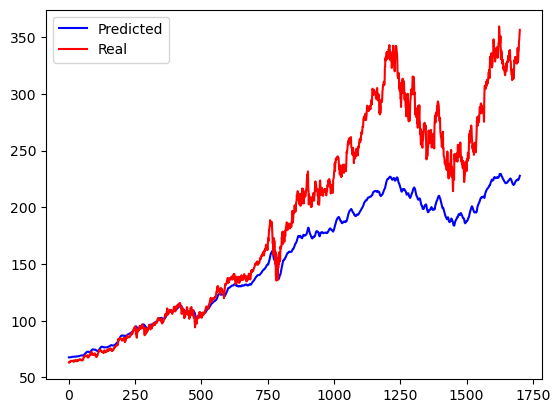

In [97]:
# Define the model
class Model(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(Model, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        output, (hidden, cell) = self.lstm(x)
        return self.fc(hidden[-1, :])

# Reshape train_x and test_x to have shape (batch_size, sequence_length, input_size)
#train_x = train_x.view(-1, seq_len, 1)
#test_x = test_x.view(-1, seq_len, 1)
#test_y=test_y.view(-1,1)
    
model = Model(input_size=1, hidden_size=32)

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_func = nn.MSELoss()

num_epochs = 100

for epoch in range(num_epochs):
    output = model(train_x)
    loss = loss_func(output, train_y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 10 == 0 and epoch != 0:
        print(epoch, "epoch loss", loss.item())

model.eval()
with torch.no_grad():
    output = model(test_x)

# Assuming mm is a MinMaxScaler or similar transformation
pred = mm.inverse_transform(output.numpy())
real = mm.inverse_transform(test_y.numpy())

plt.plot(pred.squeeze(), color="blue", label="Predicted")
plt.plot(real.squeeze(), color="red", label="Real")
plt.legend()
plt.show()